# TP3 Fonctions de deux variables. Courbes paramétrées, tangentes, courbures

## Opérateur gradient

### Question 1
Représentez sur une même image la fonction $(x,y) \mapsto x^2+2y^2$, vue en niveau de gris ou en couleur, et les vecteurs gradient, obtenus de manière analytique (c'est à dire via une formule). Vous prendrez en compte:

- La documentation de la fonction imshow pour avoir des axes qui comportent la bonne unité.
- La documentation de la fonction quiver pour afficher un champ de vecteur.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


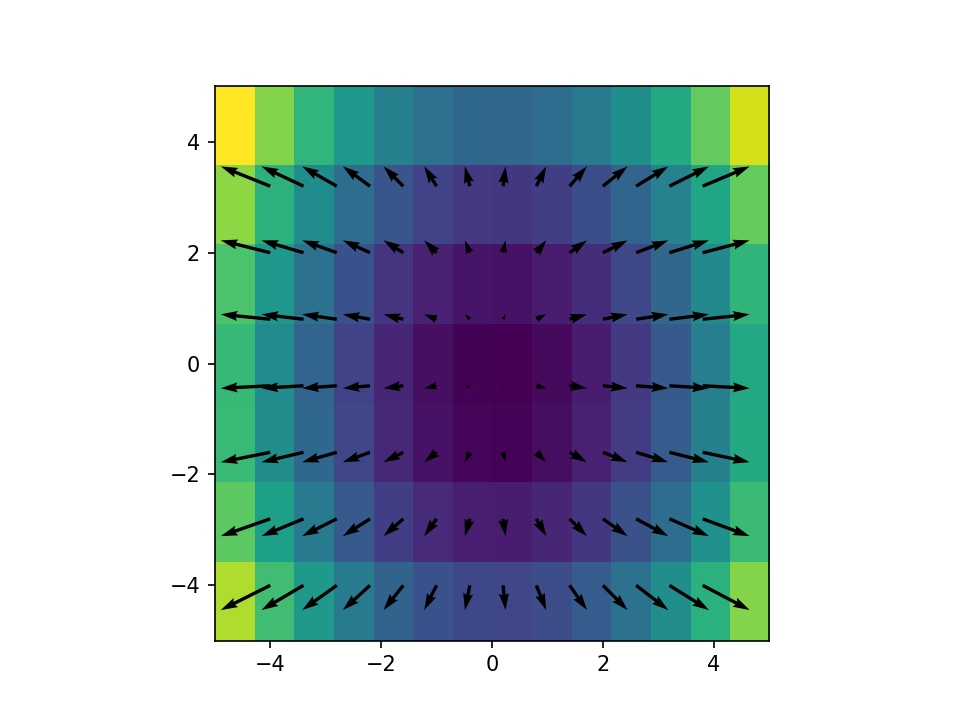

In [3]:

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D #import 3d projection

# define linear spaces with the same number of elements
h = 0.3
x = np.arange(-2, 2, h)
y = np.arange(-1, 1, h)


# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')

# plot x axis as image
"""
plt.imshow(xx)
plt.colorbar()
"""

#define 2 variable function
def f2v(x,y):
    return x**2+2*y**2

# third axis - function values
zs = np.array(f2v(np.ravel(xx), np.ravel(yy)))
Z = zs.reshape(xx.shape)


def grad(x,y):
    return 2*x,4*y


w = np.zeros_like(Z)

grad_x, grad_y = grad(xx,yy)

plt.figure()
plt.imshow(Z,extent=[-5,5,-5,5]) #use extende with number of elements in grid
plt.quiver(grad_x,grad_y,xx,yy)
plt.show()



### Question 2

- Reprenez la question précédente en calculant cette fois le gradient par une méthode de discrétisation par différences fines.

- Visualisez l'erreur de discrétisation, par exemple en affichant en chaque pixel la norme de la différence entre le gradient exact et le gradient approché.


<IPython.core.display.Javascript object>


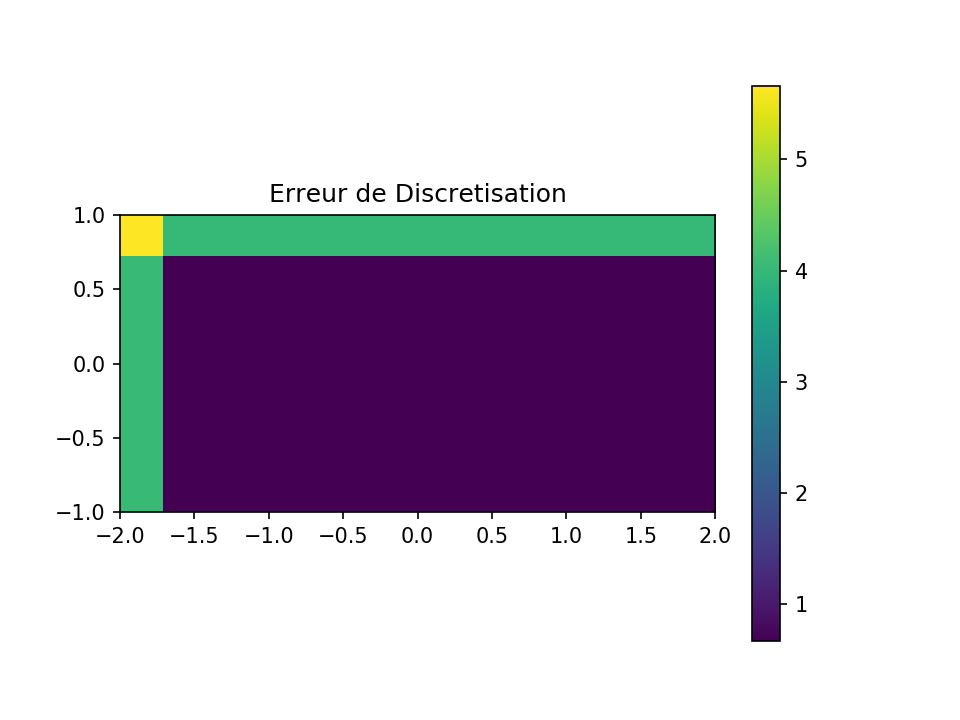

In [4]:
A = np.diff(Z)
grad_x1 = np.zeros(Z.shape)
grad_x1[:,1:] = A / h

B = np.diff(Z, axis = 0)
grad_y1 = np.zeros(Z.shape)
grad_y1[1:,:] = B / h

err_X = grad_x - grad_x1
err_Y = grad_y - grad_y1
err_grad = np.sqrt(np.square(err_X) + np.square(err_Y))

plt.figure()
plt.title("Erreur de Discretisation")
plt.imshow(err_grad, extent = [-2,2,-1,1])
plt.colorbar()
plt.show()

### Question 3 
(Cette question anticipe la question 6 donc vous pouvez éventuellement la passer)

En un point $(x_0,y_0)$ fixé et pour une fonction $f$ quelconque, représentez le plan d'équation $f(x_0,y_0)+(x-x_0,y-y_0)\cdot \nabla f (x_0,y_0) =0$. Qu'observez vous ?

### Question 4

- Ecrire une fonction python qui calcule les extrema d'une fonction de deux variables discrétisées dans un tableau. Vous pourrez pour cela calculer la norme du gradient et détecter des points ou celle-ci est proche de $0$.

- Appliquer votre fonction aux exemples vus en cours, en particulier à $(x,y) \mapsto x^2-y^2$.

In [5]:
def fonction(x,y):
    return x**2-y**2

def f_grad(x,y):
    return 2*x, -2*y

def gradient_norm(X,Y):
    return np.sqrt(X**2+Y**2)

# define linear spaces with the same number of elements
x = np.linspace(-2,2,50)
y = np.linspace(-1,1,50)

# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')

# third axis - function values
zs = np.array(fonction(np.ravel(xx), np.ravel(yy)))
Z = zs.reshape(xx.shape)


grad_x,grad_y = f_grad(xx,yy)

GN = gradient_norm(grad_x,grad_y)

print("Checking for local extrema")

for i in range(GN.shape[0]):
    for j in range(GN.shape[1]):
        if  GN[i,j] < 0.1:
            print( x[i] , y[j] )

Checking for local extrema
-0.04081632653061229 -0.020408163265306145
-0.04081632653061229 0.020408163265306145
0.04081632653061229 -0.020408163265306145
0.04081632653061229 0.020408163265306145


## Opérateur laplacien

### Question 4
- Ecrire une fonction python qui calcule le laplacien d'une fonction dont les valeurs discrétisées sont stockées dans un numpy.array. On redonne l'approximation du laplacien en un point $(x_i,y_j)$ d'une grille où les deux axes sont uniformément échantillonnés avec un pas $h$:
$$ \Delta f(x_i,y_j) \approx -4 f(x_i,y_j)+f(x_{i-1},y_j)+f(x_{i+1},y_j)+f(x_i,y_{j-1})+f(x_i,y_{j+1})$$
- Tester votre fonction sur l'application $$f:(x,y) \in [-1,1]\times [-1,1] \mapsto \frac{\exp(-ax)}{1+\exp(-ax)}$$ où $a$ est un paramètre qu'on peut prendre par exemple égal à 10. 
Vous visualiserez tout d'abord la surface associée à $f$ et verrez en quoi elle constitue un bon modèle de contours dans une image.

## Courbe paramétrée

### Question 5
- Représenter la cardioide d'équation $$t \mapsto \begin{pmatrix}
\cos t (1+ \cos t )\\
\sin t (1+ \cos t)
\end{pmatrix} $$
définie sur l'intervalle $[0,2\pi]$
- Ajouter sur la figure les vecteurs tangents que vous aurez calculés au préalable

<IPython.core.display.Javascript object>


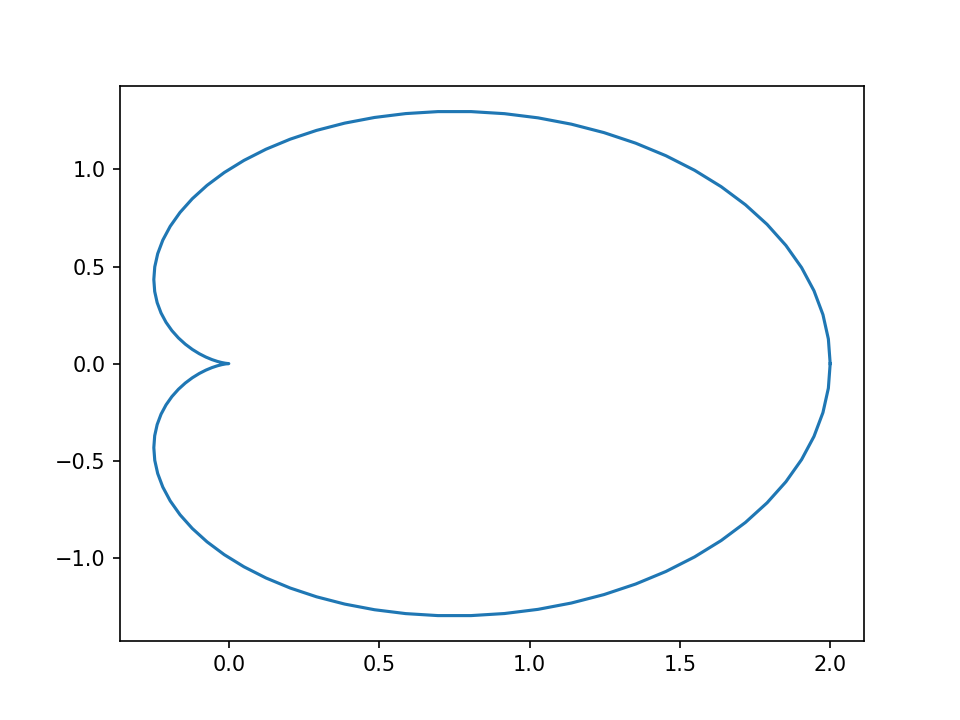

In [6]:

def deriv(f,x,h=0.000000001 ): 
    return (f(x+h) - f(x))/h

def tangent_line(f,x_0,x,h=0.000000001):
    y = f(x) 
    y_0 = f(x_0)
    return deriv(f,x_0,h) * (x - x_0) + y_0

def der(f,x,h=0.000000001 ):
    x0,y0 = f(x+h)
    x1,y1 = f(x)
    return (x0 -x1)/h,(y0 -y1)/h

def f(k):
    return np.cos(k)*(1+np.cos(k))
                   
t = np.linspace(0,2*np.pi,100)

def cardioide(k):
    return (np.cos(k)*(1+np.cos(k)),np.sin(k)*(1+np.cos(k)))

deriv1, deriv2 = der(f,x,h)

card1, card2 = cardioide(t)
plt.figure()
plt.plot(card1, card2)
plt.quiver(card1[:-1],card2[:-1],)
plt.show()

## Surface paramétrée

### Question 6
- Ecrire une représentation paramétrique de la sphère de centre $(0,0,0)$ et de rayon $1$. Visualiser celle-ci.
- Calculer les normales au niveau des points de discrétisation et les représenter.
- Représenter aussi le plan tangent en un point quelconque de cette surface.

<IPython.core.display.Javascript object>


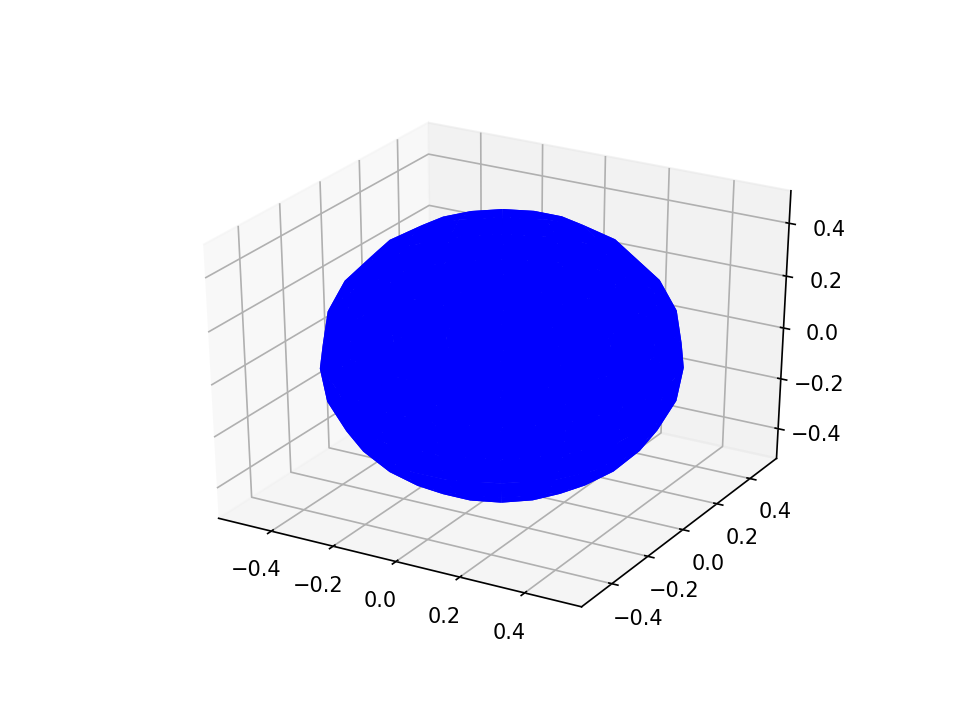

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u = np.linspace(0, 2 * np.pi, 19)
v = np.linspace(0, np.pi, 13)

x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)

ax.plot_surface(x, y, z, rstride=1, cstride=1, color='b', shade=0)

plt.show()